## Assignment 2 - Simple image search
__DESCRIPTION__

Creating a simple image search script

Download the Oxford-17 flowers image data set, available at this link:



https://www.robots.ox.ac.uk/~vgg/data/flowers/17/

Upload this .tgz file to worker02



Choose one image in your data that you want to be the 'target image'. Write a Python script or Notebook which does the following:

Use the cv2.compareHist() function to compare the 3D color histogram for your target image to each of the other images in the corpus one-by-one.
In particular, use chi-square distance method, like we used in class. Round this number to 2 decimal places.
Save the results from this comparison as a single .csv file, showing the distance between your target image and each of the other images. The .csv file should show the filename for every image in your data except the target and the distance metric between that image and your target. Call your columns: filename, distance.


__General instructions__

For this exercise, you can upload either a standalone script OR a Jupyter Notebook <br>
Save your script as image_search.py OR image_search.ipynb <br>
If you have external dependencies, you must include a requirements.txt <br>
You can either upload the script here or push to GitHub and include a link - or both! <br>
Your code should be clearly documented in a way that allows others to easily follow along <br>
Similarly, remember to use descriptive variable names! A name like hist is more readable than h. <br>
The filenames of the saved images should clearly relate to the original image <br>


__Purpose__

This assignment is designed to test that you have a understanding of: <br>

how to make extract features from images based on colour space; <br>
how to compare images for similarity based on their colour histogram; <br>
how to combine these skills to create an image 'search engine' <br>

In [1]:
# Weed to include the home directory in our path, so we can read it
# system stuff
import os 
import sys
sys.path.append(os.path.join(".."))
from pathlib import Path
from os import listdir
import csv

# image processing
import cv2
import numpy as np
import pandas as pd

# display utils
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [2]:
#Firstly we choose our target image to compare the similarities to:
target_image = cv2.imread(os.path.join("..","data","17flowers", "jpg","image_0006.jpg"))

#Then we make a data_path for the folder of the pictures of the flowers
data_path = os.path.join("..","data","17flowers", "jpg")

#creating the path to where the csv-file will be saved
outpath = os.path.join("..", "data", "flowers_distance.csv")


#histogram for target_image
target_hist = cv2.calcHist([target_image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

#normalize the target_image
norm_target_hist = cv2.normalize(target_hist, target_hist, 0,255, cv2.NORM_MINMAX)

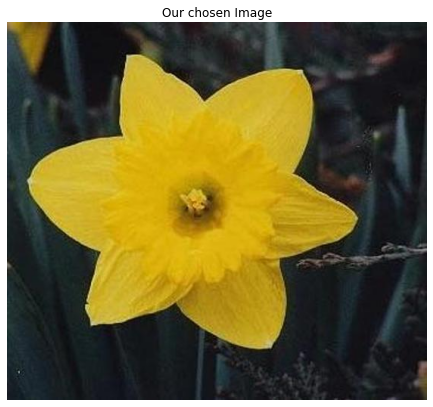

In [3]:
jimshow(target_image, "Our chosen Image")

In [4]:
#Creating containers for the results after the loop
results = []
new_results = ["Filename", "Distance"]

for image in Path(data_path).glob("*.jpg"):
    image_open = cv2.imread(str(image))
    image_name = os.path.basename(data_path)
    #create histogram
    hist = cv2.calcHist([image_open], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
    #normalize 
    norm_hist = cv2.normalize(hist, hist, 0,255, cv2.NORM_MINMAX)

    
    #Calculating the result of the distance between every image and the target image.
    result = (round(cv2.compareHist(norm_target_hist, norm_hist, cv2.HISTCMP_CHISQR), 2))
    
    #Using an if-statement to make sure the target_image is not being saved.
    if result > 0: #If the result is 0, the pictures to be compared are identical.
        results.append(f"{image}, {result}") #appending the result and the names for the compared picture to the results list.
    
#Sorting the results so they are in alphabetical order based on the filename.
sorted_results = sorted(results)



In [5]:
len(sorted_results) #here we check if the length of our sorted results are correct

1359

In [6]:
print(sorted_results) #With print we can see it is sorted as we have image_0001 first and image_00002 second etc. 

['../data/17flowers/jpg/image_0001.jpg, 20877.93', '../data/17flowers/jpg/image_0002.jpg, 184153.25', '../data/17flowers/jpg/image_0003.jpg, 947912.79', '../data/17flowers/jpg/image_0004.jpg, 8755094.46', '../data/17flowers/jpg/image_0005.jpg, 455112.73', '../data/17flowers/jpg/image_0007.jpg, 7464.81', '../data/17flowers/jpg/image_0008.jpg, 711580.17', '../data/17flowers/jpg/image_0009.jpg, 9558898.01', '../data/17flowers/jpg/image_0010.jpg, 492924.99', '../data/17flowers/jpg/image_0011.jpg, 15705.0', '../data/17flowers/jpg/image_0012.jpg, 434709.75', '../data/17flowers/jpg/image_0013.jpg, 112075.59', '../data/17flowers/jpg/image_0014.jpg, 151613.94', '../data/17flowers/jpg/image_0015.jpg, 5916677.11', '../data/17flowers/jpg/image_0016.jpg, 76882.63', '../data/17flowers/jpg/image_0017.jpg, 1026191.97', '../data/17flowers/jpg/image_0018.jpg, 2101176.24', '../data/17flowers/jpg/image_0019.jpg, 163661.41', '../data/17flowers/jpg/image_0020.jpg, 4518.71', '../data/17flowers/jpg/image_0021

__Making it to a csv__ 

In [7]:
#writing a csv-file with two columns of Filename and Distance
with open(outpath, "w", encoding="utf-8") as distance_file:
    writer = csv.writer(distance_file)    
    writer.writerow(["Filename", "Distance"])
    

#We create a for-loop that runs through the sorted results.
for result in sorted_results:
    
    #Slicing the name down to only containing "image_0001.jpg" as there are 22 
    #characters in the directory of ("data/17flowers/jpg...") etc. we make the slice start there.
    sliced_names = result[22:36]
    
    #Slicing the result from the rest so only the histogram difference is left. 
    sliced_result = result[38:len(result)]
    
    #Now writing our sliced names and sliced results to the csv-file to the outpath and appending each image name and its distance.
    #This time 'a' is used instead of 'w' because we are appending and don't want to overwrite the original Filename and Distance.
    with open(outpath, 'a', newline='') as distance_file:
        writer = csv.writer(distance_file)
        writer.writerow([sliced_names, sliced_result])
    
    
    #Also appending to the list new_results above
    new_results.append(result[22:len(result)])


In [8]:
#Displaying the list:
new_results

['Filename',
 'Distance',
 'image_0001.jpg, 20877.93',
 'image_0002.jpg, 184153.25',
 'image_0003.jpg, 947912.79',
 'image_0004.jpg, 8755094.46',
 'image_0005.jpg, 455112.73',
 'image_0007.jpg, 7464.81',
 'image_0008.jpg, 711580.17',
 'image_0009.jpg, 9558898.01',
 'image_0010.jpg, 492924.99',
 'image_0011.jpg, 15705.0',
 'image_0012.jpg, 434709.75',
 'image_0013.jpg, 112075.59',
 'image_0014.jpg, 151613.94',
 'image_0015.jpg, 5916677.11',
 'image_0016.jpg, 76882.63',
 'image_0017.jpg, 1026191.97',
 'image_0018.jpg, 2101176.24',
 'image_0019.jpg, 163661.41',
 'image_0020.jpg, 4518.71',
 'image_0021.jpg, 401214.34',
 'image_0022.jpg, 4367.09',
 'image_0023.jpg, 11842.56',
 'image_0024.jpg, 587488.4',
 'image_0025.jpg, 53799.86',
 'image_0026.jpg, 168323.11',
 'image_0027.jpg, 1504331.76',
 'image_0028.jpg, 151045.93',
 'image_0029.jpg, 75171.4',
 'image_0030.jpg, 26755.75',
 'image_0031.jpg, 58151.05',
 'image_0032.jpg, 24243.51',
 'image_0033.jpg, 30382.56',
 'image_0034.jpg, 799345.25